In [4]:
# Data Loading and Numerical Operations
import pandas as pd
import numpy as np
# Data Visualizations
import os
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Data Scaling
from sklearn.preprocessing import MinMaxScaler
# Data Splitting
from sklearn.model_selection import train_test_split
# Data Modeling
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve, classification_report
# Hyperparameter Tuning
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score

In [5]:
import matplotlib.pyplot as plt
from importlib import reload
plt=reload(plt)


### 1. Visualization with Pandas

In [6]:
df = pd.read_csv(r'framingham.csv', header='infer')

In [7]:
df.shape #  print the number of rows and columns of my DataFrame

(4238, 16)

In [8]:
df.head(5) # The head() function is used to get the first n rows.

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [9]:
df.tail(5) # The tail() function is used to get the last n rows.

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
4233,1,50,1.0,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1
4234,1,51,3.0,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0
4235,0,48,2.0,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0
4237,0,52,2.0,0,0.0,0.0,0,0,0,269.0,133.5,83.0,21.47,80.0,107.0,0


### Checking Statistical Measure:

In [10]:
df.describe() #The describe() method returns description of the data in the DataFrame

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4238.000000,4238.000000,4133.000000,4238.000000,4209.000000,4185.000000,4238.000000,4238.000000,4238.000000,4188.000000,4238.000000,4238.000000,4219.000000,4237.000000,3850.000000,4238.000000
mean,0.429212,49.584946,1.978950,0.494101,9.003089,0.029630,0.005899,0.310524,0.025720,236.721585,132.352407,82.893464,25.802008,75.878924,81.966753,0.151958
std,0.495022,8.572160,1.019791,0.500024,11.920094,0.169584,0.076587,0.462763,0.158316,44.590334,22.038097,11.910850,4.080111,12.026596,23.959998,0.359023
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,89.875000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


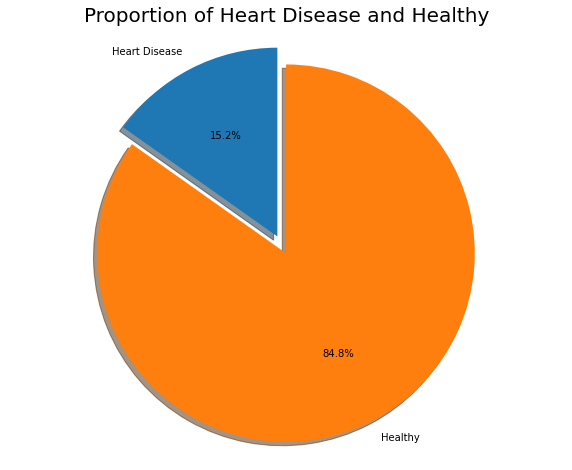

In [11]:
# here I have used matplotlib as visualization to get the outline of my data
labels = 'Heart Disease', 'Healthy' # I have given the labels as peoples with heart disease and healthy ones
sizes = [df.TenYearCHD[df["TenYearCHD"]==1].count(), df.TenYearCHD[df["TenYearCHD"]==0].count()]
explode = (0, 0.1)
fig1, ax1 = plt.subplots(figsize=(10, 8))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.title("Proportion of Heart Disease and Healthy", size = 20)
plt.show()

### Data Preprocessing

In [12]:
df.isnull().sum().sort_values(ascending=False) # df.isnull().sum() prints the column with missing value. 
                                            
                                               # output gives glucose with the highest null values

glucose            388
education          105
BPMeds              53
totChol             50
cigsPerDay          29
BMI                 19
heartRate            1
male                 0
age                  0
currentSmoker        0
prevalentStroke      0
prevalentHyp         0
diabetes             0
sysBP                0
diaBP                0
TenYearCHD           0
dtype: int64

<AxesSubplot:>

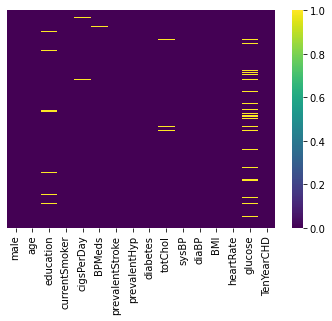

In [13]:
# plot heatmap
sns.heatmap (df.isnull(), yticklabels =False, cmap='viridis')

In [14]:
df.duplicated().sum()

0

#### Filling the missing spaces of glucosecolumn with the mode of the data (Mode = 75) present to reduce the number of missing data in our dataset

In [15]:
print((df["glucose"].mode())[0])

75.0


In [16]:
df["glucose"].fillna((df["glucose"].mode())[0], inplace=True)

In [17]:
df.dropna(inplace=True)
df.isnull().sum()

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

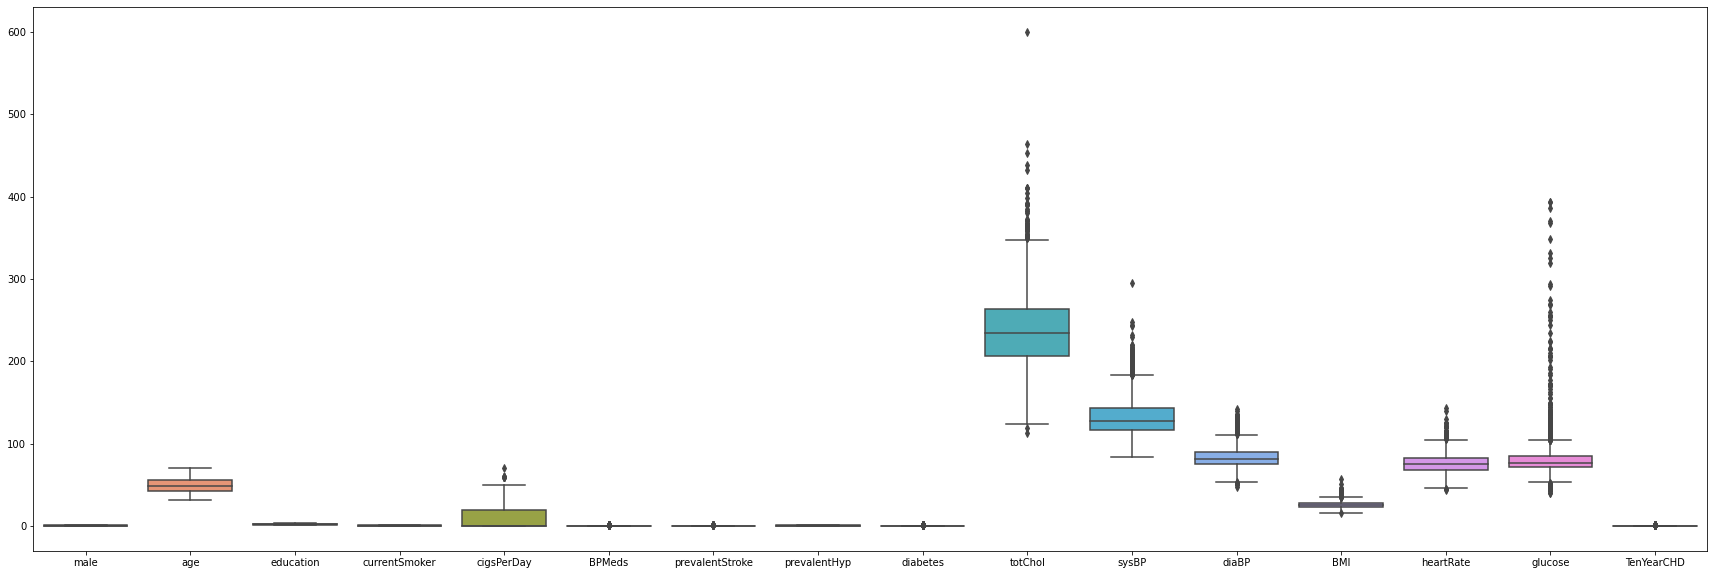

In [18]:
plt.figure(figsize=(30,10), facecolor='w')
sns.boxplot(data=df)
plt.show()

#### Removable Outliers are detected in totChol and sysBP columns of our dataset. Outliers in all other numerical columns are important and thus cannot be removed. The Outlier present in totChol is 600. The Outlier present in sysBP is 295.

In [19]:
print(df['totChol'].max())
print(df['sysBP'].max())

600.0
295.0


In [20]:
df.shape
df = df[df['totChol']<600.0]
df = df[df['sysBP']<295.0]

In [21]:
df.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3985.000000,3985.000000,3985.000000,3985.000000,3985.000000,3985.000000,3985.000000,3985.000000,3985.000000,3985.000000,3985.000000,3985.000000,3985.000000,3985.000000,3985.000000,3985.000000
mean,0.433375,49.474529,1.982183,0.491343,9.024843,0.029360,0.005521,0.309159,0.025094,236.525220,132.175031,82.845295,25.770750,75.869260,81.275031,0.148808
std,0.495603,8.530533,1.020834,0.499988,11.915833,0.168835,0.074105,0.462205,0.156431,43.651946,21.798425,11.855084,4.075439,12.087749,22.960124,0.355944
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,113.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.060000,68.000000,72.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.380000,75.000000,77.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,143.000000,89.500000,27.990000,83.000000,85.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,464.000000,248.000000,142.500000,56.800000,143.000000,394.000000,1.000000


In [22]:
#Checking relationship between variables
cor=df.corr()
cor

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
male,1.000000,-0.022235,0.012785,0.201021,0.326216,-0.050110,-0.003651,0.007760,0.018333,-0.067305,-0.031883,0.059774,0.079957,-0.115356,0.009177,0.092499
age,-0.022235,1.000000,-0.160269,-0.213397,-0.190141,0.128526,0.045090,0.304449,0.104873,0.271017,0.389739,0.205375,0.133180,-0.008901,0.115920,0.228785
education,0.012785,-0.160269,1.000000,0.018139,0.006082,-0.010071,-0.028561,-0.081419,-0.034923,-0.022794,-0.127519,-0.062823,-0.135427,-0.057836,-0.031222,-0.053491
currentSmoker,0.201021,-0.213397,0.018139,1.000000,0.770709,-0.049023,-0.032582,-0.104632,-0.038941,-0.047260,-0.129664,-0.108643,-0.164071,0.052329,-0.051569,0.023460
cigsPerDay,0.326216,-0.190141,0.006082,0.770709,1.000000,-0.044031,-0.033982,-0.065883,-0.035211,-0.024816,-0.086910,-0.050297,-0.086776,0.067909,-0.050980,0.060261
BPMeds,-0.050110,0.128526,-0.010071,-0.049023,-0.044031,1.000000,0.127474,0.259984,0.048127,0.087240,0.262679,0.196835,0.103288,0.016394,0.054379,0.090173
prevalentStroke,-0.003651,0.045090,-0.028561,-0.032582,-0.033982,0.127474,1.000000,0.067408,0.009699,0.008182,0.055728,0.049543,0.031494,-0.012084,0.016515,0.044974
prevalentHyp,0.007760,0.304449,-0.081419,-0.104632,-0.065883,0.259984,0.067408,1.000000,0.073195,0.163593,0.696082,0.615298,0.303591,0.151225,0.083851,0.174948
diabetes,0.018333,0.104873,-0.034923,-0.038941,-0.035211,0.048127,0.009699,0.073195,1.000000,0.032071,0.100624,0.050413,0.082427,0.051514,0.608594,0.086188
totChol,-0.067305,0.271017,-0.022794,-0.047260,-0.024816,0.087240,0.008182,0.163593,0.032071,1.000000,0.214820,0.171610,0.122613,0.088664,0.044300,0.077971


In [23]:
df.isnull().sum().sort_values(ascending=False)

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

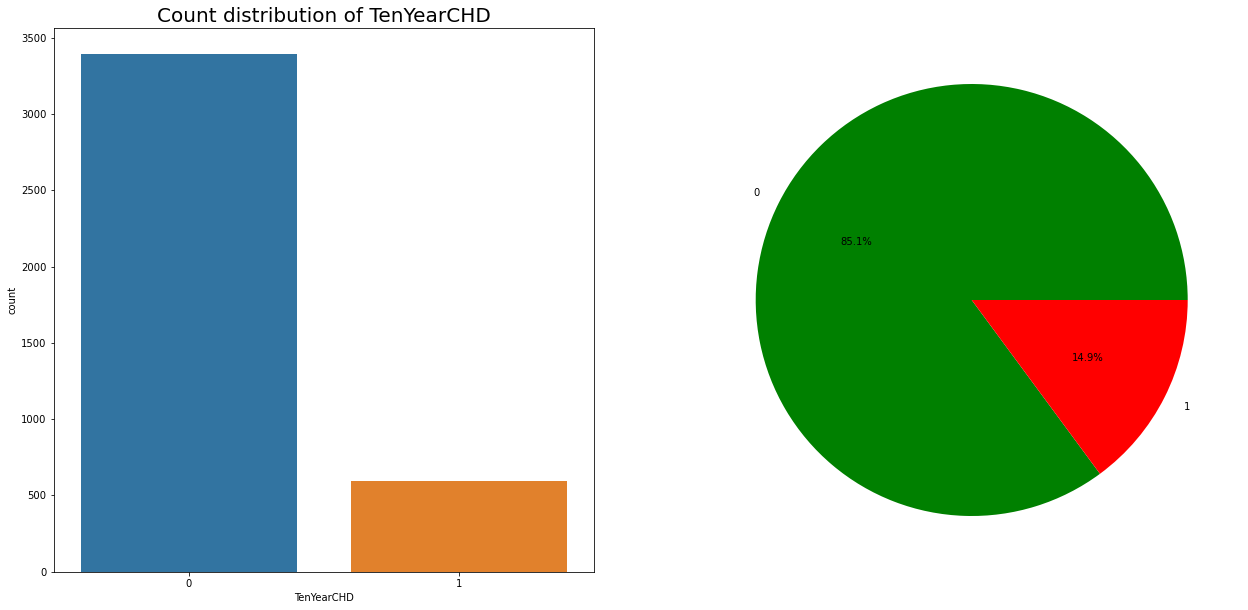

In [24]:
#Distribution of outcome variable, Heart Disease
plt.figure(figsize=(12, 10), facecolor='w')
plt.subplots_adjust(right=1.5)
plt.subplot(121)
sns.countplot(x="TenYearCHD", data=df)
plt.title("Count distribution of TenYearCHD", size=20)
plt.subplot(122)
labels=[0,1]
plt.pie(df["TenYearCHD"].value_counts(),autopct="%1.1f%%",labels=labels,colors=["green","red"])
plt.show()

#### The distribution is highly imbalanced as the number of negative cases outweigh the number of positive cases which would lead to class imbalance problem while fitting our models

(array([  0.,  50., 100., 150., 200., 250., 300., 350.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

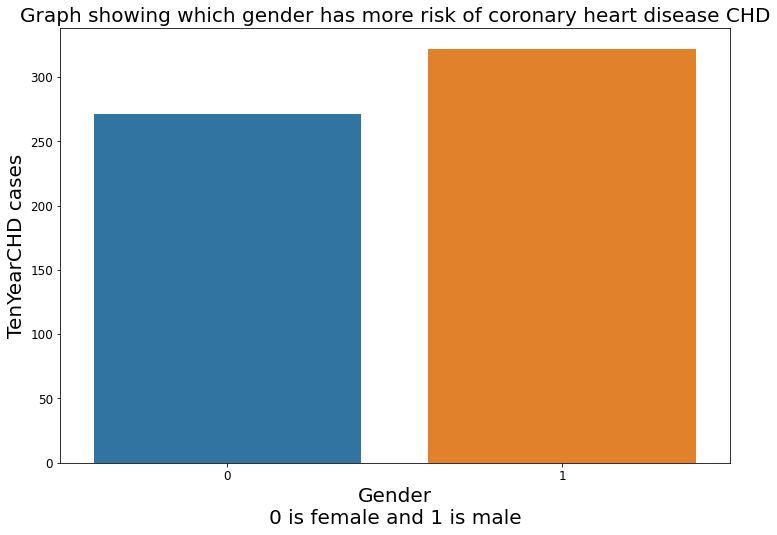

In [25]:
#Bivariate ananlysis
#checking for which gender has more risk of coronary heart disease CHD

graph_2 = df.groupby("male", as_index=False).TenYearCHD.sum()
#Ploting the above values

plt.figure(figsize=(12,8), facecolor='w')
sns.barplot(x=graph_2["male"], y=graph_2["TenYearCHD"])
plt.title("Graph showing which gender has more risk of coronary heart disease CHD", size=20)
plt.xlabel("Gender\n0 is female and 1 is male",size=20)
plt.ylabel("TenYearCHD cases", size=20)
plt.xticks(size=12)
plt.yticks(size=12)

In [26]:
data = df

(array([-50.,   0.,  50., 100., 150., 200., 250., 300.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

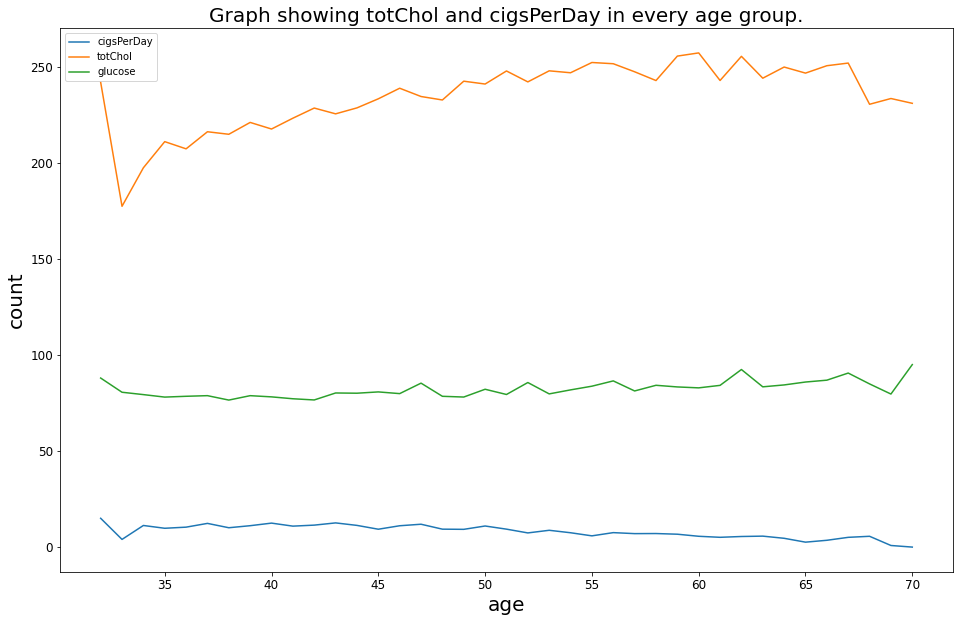

In [27]:
# Multivariate analysis

#Plotting a linegraph to check the relationship between age and cigsPerDay, totChol, glucose.

graph_5 = data.groupby("age").cigsPerDay.mean()
graph_6 = data.groupby("age").totChol.mean()
graph_7 = data.groupby("age").glucose.mean()

plt.figure(figsize=(16,10), facecolor='w')
sns.lineplot(data=graph_5, label="cigsPerDay")
sns.lineplot(data=graph_6, label="totChol")
sns.lineplot(data=graph_7, label="glucose")
plt.title("Graph showing totChol and cigsPerDay in every age group.", size=20)
plt.xlabel("age", size=20)
plt.ylabel("count", size=20)
plt.xticks(size=12)
plt.yticks(size=12)

In [28]:
# Data Resampling
from sklearn.utils import resample

In [29]:
# Resampling
target1=df[df['TenYearCHD']==1]
target0=df[df['TenYearCHD']==0]

In [30]:
target1=resample(target1,replace=True,n_samples=len(target0),random_state=40)
target=pd.concat([target0,target1])
target['TenYearCHD'].value_counts() 


df=target
np.shape(df)

(6784, 16)

In [55]:
target['TenYearCHD'].value_counts() 

0    3392
1    3392
Name: TenYearCHD, dtype: int64

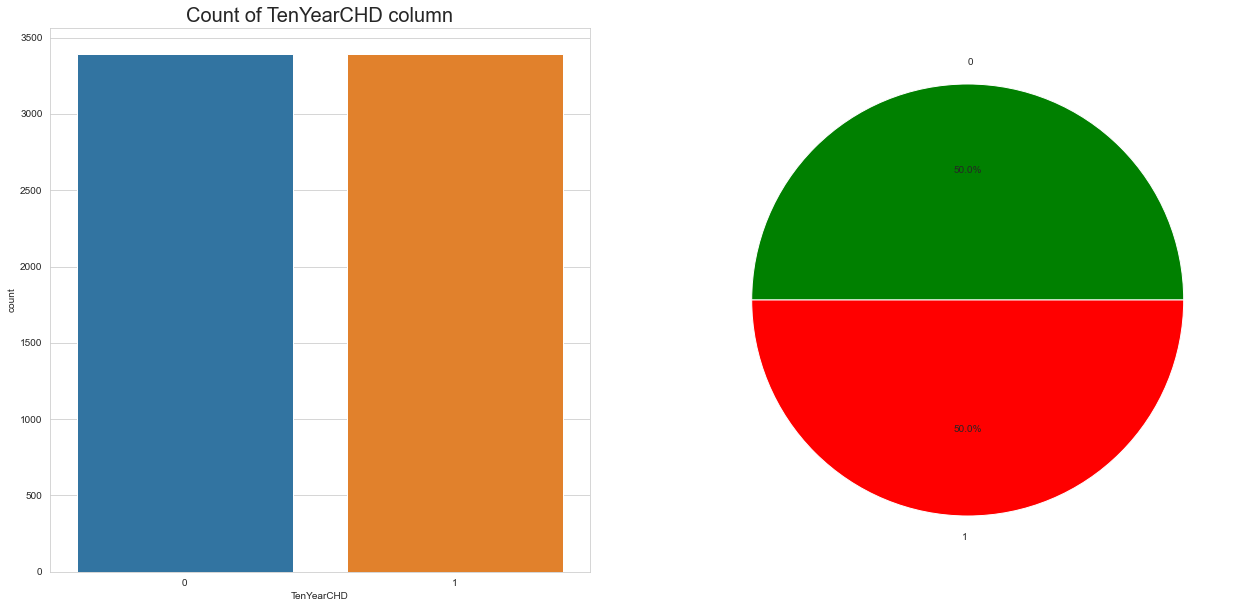

In [57]:
#Distribution of heart disease cases in the balanced dataset, the outcome variable
plt.figure(figsize=(12, 10), facecolor='w')
plt.subplots_adjust(right=1.5)
plt.subplot(121)
sns.countplot(x="TenYearCHD", data=target)
plt.title("Count of TenYearCHD column", size=20)
plt.subplot(122)
labels=[0,1]
plt.pie(target["TenYearCHD"].value_counts(),autopct="%1.1f%%",labels=labels,colors=["green","red"])
plt.show()

In [58]:
#To idenfify the features that have larger contribution towards the outcome variable, TenYearCHD
X=target.iloc[:,0:15]
y=target.iloc[:,-1]
print("X - ", X.shape, "\ny - ", y.shape)

X -  (6784, 15) 
y -  (6784,)


In [59]:
# Data Feature Selection
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [60]:
#Apply SelectKBest and extract top 10 features
best=SelectKBest(score_func=chi2, k=10)
fit=best.fit(X,y)
data_scores=pd.DataFrame(fit.scores_)
data_columns=pd.DataFrame(X.columns)

#Join the two dataframes
scores=pd.concat([data_columns,data_scores],axis=1)
scores.columns=['Feature','Score']
print(scores.nlargest(11,'Score'))

         Feature        Score
10         sysBP  2127.940554
14       glucose  1233.362900
1            age  1004.535192
4     cigsPerDay   790.532235
9        totChol   766.291552
11         diaBP   488.928591
7   prevalentHyp   221.768997
0           male    66.816351
5         BPMeds    66.216216
8       diabetes    54.258065
12           BMI    44.855037


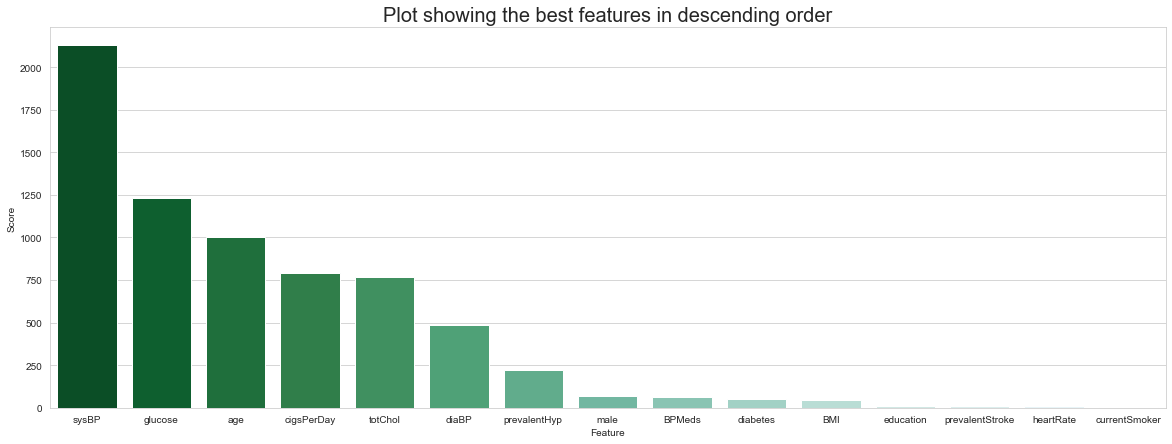

In [61]:
#To visualize feature selection
scores=scores.sort_values(by="Score", ascending=False)
plt.figure(figsize=(20,7), facecolor='w')
sns.barplot(x='Feature',y='Score',data=scores,palette='BuGn_r')
plt.title("Plot showing the best features in descending order", size=20)
plt.show()

In [62]:
#Select 10 features
features=scores["Feature"].tolist()[:10]
features

data=data[['sysBP','glucose','age','cigsPerDay','totChol','diaBP','prevalentHyp','male','BPMeds','diabetes','TenYearCHD']]
data.head()

,sysBP,glucose,age,cigsPerDay,totChol,diaBP,prevalentHyp,male,BPMeds,diabetes,TenYearCHD
0,106.0,77.0,39,0.0,195.0,70.0,0,1,0.0,0,0
1,121.0,76.0,46,0.0,250.0,81.0,0,0,0.0,0,0
2,127.5,70.0,48,20.0,245.0,80.0,0,1,0.0,0,0
3,150.0,103.0,61,30.0,225.0,95.0,1,0,0.0,0,1
4,130.0,85.0,46,23.0,285.0,84.0,0,0,0.0,0,0


### Splitting Data into Training and Test Set

In [63]:
X = df.drop("TenYearCHD",axis=1)
y = df["TenYearCHD"]
print(X.columns)
print(y)

Index(['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose'],
      dtype='object')
0       0
1       0
2       0
4       0
5       0
       ..
4058    1
3489    1
1195    1
1691    1
2041    1
Name: TenYearCHD, Length: 6784, dtype: int64


In [64]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(5427, 15)
(1357, 15)
(5427,)
(1357,)


In [65]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [66]:
def get_cross_val(model, X_train, y_train, X_valid, y_valid):
    
    # Fit on train, predict on validation
    clf = model
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_valid)
    
    # Cross validation score over 10 folds
    scores = cross_val_score(clf, X_train, y_train, cv=10)
    print("Cross validation over 10 folds: ", sum(scores)/10.0)
    
    return y_pred

### Model Training with Logistic Regression

In [67]:
m1 = 'LogisticRegression'
lr = LogisticRegression(random_state=1, max_iter=1000)
lr.fit(X_train, y_train)
lr_predict = lr.predict(X_test)
lr_conf_matrix = confusion_matrix(y_test, lr_predict)
lr_acc_score = accuracy_score(y_test, lr_predict)
print("confusion matrix")
print(lr_conf_matrix)
print("\n")
print("Accuracy of Logistic Regression:",lr_acc_score*100,'\n')
print(classification_report(y_test,lr_predict))
get_cross_val(lr, X_train, y_train, X_test, y_test)

confusion matrix
[[446 237]
 [210 464]]


Accuracy of Logistic Regression: 67.05969049373618 

              precision    recall  f1-score   support

           0       0.68      0.65      0.67       683
           1       0.66      0.69      0.67       674

    accuracy                           0.67      1357
   macro avg       0.67      0.67      0.67      1357
weighted avg       0.67      0.67      0.67      1357

Cross validation over 10 folds:  0.6793843822416125


array([0, 0, 0, ..., 0, 1, 0], dtype=int64)

### Random Forests

In [68]:
from sklearn.ensemble import RandomForestClassifier
m2 = 'Random Forest Classfier'
rf = RandomForestClassifier(n_estimators=200, random_state=0,max_depth=12)
rf.fit(X_train,y_train)
rf_predicted = rf.predict(X_test)
rf_conf_matrix = confusion_matrix(y_test, rf_predicted)
rf_acc_score = accuracy_score(y_test, rf_predicted)
print("confusion matrix")
print(rf_conf_matrix)
print("\n")
print("Accuracy of Random Forest:",rf_acc_score*100,'\n')
print(classification_report(y_test,rf_predicted))
get_cross_val(rf, X_train, y_train, X_test, y_test)

confusion matrix
[[598  85]
 [ 11 663]]


Accuracy of Random Forest: 92.92557111274871 

              precision    recall  f1-score   support

           0       0.98      0.88      0.93       683
           1       0.89      0.98      0.93       674

    accuracy                           0.93      1357
   macro avg       0.93      0.93      0.93      1357
weighted avg       0.93      0.93      0.93      1357

Cross validation over 10 folds:  0.9226098006836422


array([0, 0, 1, ..., 0, 1, 0], dtype=int64)

### K Neighbors Classifier

In [69]:
from sklearn.neighbors import KNeighborsClassifier
m3 = 'KNeighborsClassifier'
knn = KNeighborsClassifier(n_neighbors=1)
model = knn.fit(X_train, y_train)
knn_predict = knn.predict(X_test)
knn_conf_matrix = confusion_matrix(y_test, knn_predict)
knn_acc_score = accuracy_score(y_test, knn_predict)
print("confusion matrix")
print(knn_conf_matrix)
print("\n")
print("Accuracy of k-NN Classification:",knn_acc_score*100,'\n')
print(classification_report(y_test, knn_predict))
get_cross_val(knn, X_train, y_train, X_test, y_test)

confusion matrix
[[583 100]
 [  7 667]]


Accuracy of k-NN Classification: 92.11495946941784 

              precision    recall  f1-score   support

           0       0.99      0.85      0.92       683
           1       0.87      0.99      0.93       674

    accuracy                           0.92      1357
   macro avg       0.93      0.92      0.92      1357
weighted avg       0.93      0.92      0.92      1357

Cross validation over 10 folds:  0.920027794200594


array([0, 0, 1, ..., 0, 1, 0], dtype=int64)

In [70]:
m4 = 'Gradient Boosting Classifier'
gb_clf =  GradientBoostingClassifier()
gb_clf.fit(X_train, y_train)
gb_clf_predicted = gb_clf.predict(X_test)
gb_clf_conf_matrix = confusion_matrix(y_test, gb_clf_predicted)
gb_clf_acc_score = accuracy_score(y_test, gb_clf_predicted)
print("confusion matrix")
print(gb_clf_conf_matrix)
print("\n")
print("Accuracy of Gradient Boosting Classifier:",gb_clf_acc_score*100,'\n')
print(classification_report(y_test,gb_clf_predicted))
get_cross_val(gb_clf, X_train, y_train, X_test, y_test)

confusion matrix
[[474 209]
 [162 512]]


Accuracy of Gradient Boosting Classifier: 72.66028002947678 

              precision    recall  f1-score   support

           0       0.75      0.69      0.72       683
           1       0.71      0.76      0.73       674

    accuracy                           0.73      1357
   macro avg       0.73      0.73      0.73      1357
weighted avg       0.73      0.73      0.73      1357

Cross validation over 10 folds:  0.7261894083029228


array([0, 0, 0, ..., 0, 1, 1], dtype=int64)

In [71]:
m5 = 'DecisionTreeClassifier'
dt = DecisionTreeClassifier(criterion = 'entropy',random_state=0,max_depth = 30)
dt.fit(X_train,y_train)
dt_predicted = dt.predict(X_test)
dt_conf_matrix = confusion_matrix(y_test, dt_predicted)
dt_acc_score = accuracy_score(y_test, dt_predicted)
print("confusion matrix")
print(dt_conf_matrix)
print("\n")
print("Accuracy of DecisionTreeClassifier:",dt_acc_score*100,'\n')
print(classification_report(y_test,dt_predicted))
get_cross_val(dt, X_train, y_train, X_test, y_test)

confusion matrix
[[570 113]
 [  4 670]]


Accuracy of DecisionTreeClassifier: 91.3780397936625 

              precision    recall  f1-score   support

           0       0.99      0.83      0.91       683
           1       0.86      0.99      0.92       674

    accuracy                           0.91      1357
   macro avg       0.92      0.91      0.91      1357
weighted avg       0.92      0.91      0.91      1357

Cross validation over 10 folds:  0.9060209441873426


array([0, 1, 1, ..., 0, 1, 0], dtype=int64)

In [72]:
m6 = 'Support Vector Classifier'
svc = SVC(kernel = 'linear')
svc.fit(X_train,y_train)
svc_predicted = svc.predict(X_test)
svc_conf_matrix = confusion_matrix(y_test, svc_predicted)
svc_acc_score = accuracy_score(y_test, svc_predicted)
print("confusion matrix")
print(svc_conf_matrix)
print("\n")
print("Support Vector Classifier:",svc_acc_score*100,'\n')
print(classification_report(y_test,svc_predicted))
get_cross_val(svc, X_train, y_train, X_test, y_test)
# kernels = ['linear', 'poly', 'rbf', 'sigmoid']

confusion matrix
[[433 250]
 [198 476]]


Support Vector Classifier: 66.98599852616066 

              precision    recall  f1-score   support

           0       0.69      0.63      0.66       683
           1       0.66      0.71      0.68       674

    accuracy                           0.67      1357
   macro avg       0.67      0.67      0.67      1357
weighted avg       0.67      0.67      0.67      1357

Cross validation over 10 folds:  0.679570922781051


array([0, 0, 0, ..., 0, 1, 0], dtype=int64)

In [73]:
m10 = 'Naive Bayes Classifier'
nbc = GaussianNB()
nbc.fit(X_train,y_train)
nbc_predicted = nbc.predict(X_test)
nbc_conf_matrix = confusion_matrix(y_test, nbc_predicted)
nbc_acc_score = accuracy_score(y_test, nbc_predicted)
print("confusion matrix")
print(nbc_conf_matrix)
print("\n")
print("Naive Bayes Classifier:",nbc_acc_score*100,'\n')
print(classification_report(y_test,nbc_predicted))
get_cross_val(nbc, X_train, y_train, X_test, y_test)

confusion matrix
[[596  87]
 [457 217]]


Naive Bayes Classifier: 59.911569638909356 

              precision    recall  f1-score   support

           0       0.57      0.87      0.69       683
           1       0.71      0.32      0.44       674

    accuracy                           0.60      1357
   macro avg       0.64      0.60      0.57      1357
weighted avg       0.64      0.60      0.57      1357

Cross validation over 10 folds:  0.6058581884161381


array([0, 0, 0, ..., 0, 1, 0], dtype=int64)

### ROc Curve to compare all the classifiers

In [74]:
lr_false_positive_rate,lr_true_positive_rate,lr_threshold = roc_curve(y_test,lr_predict)
knn_false_positive_rate,knn_true_positive_rate,knn_threshold = roc_curve(y_test,knn_predict)
rf_false_positive_rate,rf_true_positive_rate,rf_threshold = roc_curve(y_test,rf_predicted)                                                             
dt_false_positive_rate,dt_true_positive_rate,dt_threshold = roc_curve(y_test,dt_predicted)
gb_clf_false_positive_rate,gb_clf_true_positive_rate,gb_clf_threshold = roc_curve(y_test,gb_clf_predicted)
svc_false_positive_rate,svc_true_positive_rate,svc_threshold = roc_curve(y_test,svc_predicted)
nbc_false_positive_rate,nbc_true_positive_rate,nbc_threshold = roc_curve(y_test,nbc_predicted)

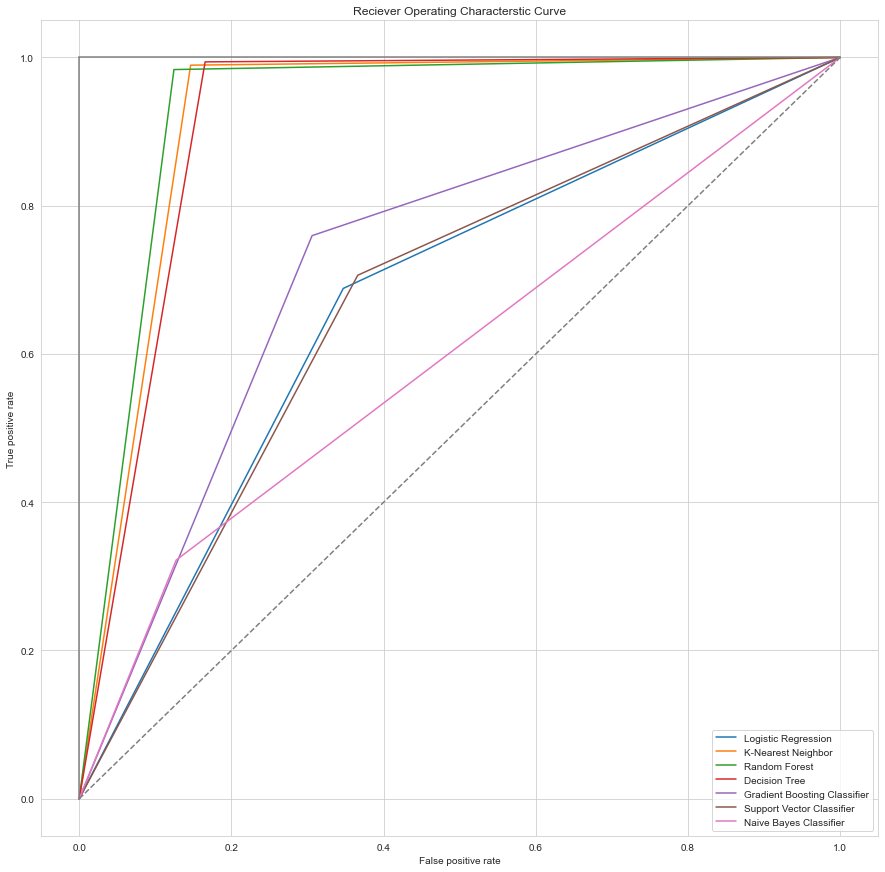

In [75]:
sns.set_style('whitegrid')
plt.figure(figsize=(15,15), facecolor='w')
plt.title('Reciever Operating Characterstic Curve')
plt.plot(lr_false_positive_rate,lr_true_positive_rate,label='Logistic Regression')
plt.plot(knn_false_positive_rate,knn_true_positive_rate,label='K-Nearest Neighbor')
plt.plot(rf_false_positive_rate,rf_true_positive_rate,label='Random Forest')
plt.plot(dt_false_positive_rate,dt_true_positive_rate,label='Decision Tree')
plt.plot(gb_clf_false_positive_rate,gb_clf_true_positive_rate,label='Gradient Boosting Classifier')
plt.plot(svc_false_positive_rate,svc_true_positive_rate,label='Support Vector Classifier')
plt.plot(nbc_false_positive_rate,nbc_true_positive_rate,label='Naive Bayes Classifier')
plt.plot([0,1],ls='--')
plt.plot([0,0],[1,0],c='.5')
plt.plot([1,1],c='.5')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.legend()
plt.show()

In [76]:
df.columns

Index(['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [77]:
lin_X = df[['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD']]
lin_y = df['sysBP']

In [78]:
X_train_lin, X_test_lin, y_train_lin, y_test_lin = train_test_split(lin_X,lin_y, test_size=0.2, random_state=42)

In [79]:
from sklearn import datasets, linear_model, metrics
reg = linear_model.LinearRegression()
 
# train the model using the training sets
reg.fit(X_train_lin, y_train_lin)
 
# regression coefficients
print('Coefficients: ', reg.coef_)

Coefficients:  [-3.53865389e+00  4.87015225e-01 -1.01547501e+00 -3.57538021e-01
  5.23345185e-02  9.80821544e+00 -3.59887851e+00  1.30873885e+01
 -2.90516964e+00  1.39413992e-02  1.07741233e+00 -9.88312136e-02
  4.27094077e-03  4.96460561e-02  1.97842634e+00]


In [80]:
m11 = 'Linear Regression'
lin_predicted = reg.predict(X_test_lin)
lin_acc_score = reg.score(X_train_lin, y_train_lin)
print("LinearRegression:",lin_acc_score*100,'\n')
get_cross_val(reg, X_train_lin, y_train_lin, X_test_lin, y_test_lin)

LinearRegression: 74.56111911121353 

Cross validation over 10 folds:  0.7422417227265352


array([124.04752812, 122.28168361, 110.17413938, ..., 134.79669393,
       145.14942759, 116.36626115])